In [11]:
import os 
import pandas as pd
pth_base ='/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/'


folder = 'My Drive/Projects/Materials/Data/250518-ResSilTa1_temp/'

folder = os.path.join(pth_base, folder)


µ

In [12]:
directories = [d for d in os.listdir(folder) if os.path.isdir(os.path.join(folder, d))]
print(directories)

['power_sweep_20250524_073013', 'power_sweep_20250524_013134', 'power_sweep_20250524_054606', 'power_sweep_20250524_023337', 'power_sweep_20250524_102309', 'power_sweep_20250524_040237', 'power_sweep_20250524_012446', 'power_sweep_20250523_232425', 'power_sweep_20250524_081158', 'power_sweep_20250524_084611', 'power_sweep_20250524_011112', 'power_sweep_20250524_083926', 'power_sweep_20250524_003040', 'power_sweep_20250524_100743', 'power_sweep_20250524_032736', 'power_sweep_20250524_053909', 'power_sweep_20250524_091440', 'power_sweep_20250524_001718', 'power_sweep_20250523_230450', 'power_sweep_20250524_043102', 'power_sweep_20250524_013816', 'power_sweep_20250523_235729', 'power_sweep_20250524_080502', 'power_sweep_20250524_011758', 'power_sweep_20250524_024017', 'power_sweep_20250524_065429', 'power_sweep_20250524_030019', 'power_sweep_20250524_010421', 'power_sweep_20250523_225130', 'power_sweep_20250523_234417', 'power_sweep_20250524_015138', 'power_sweep_20250524_094527', 'power_

In [14]:
len(directories)

113

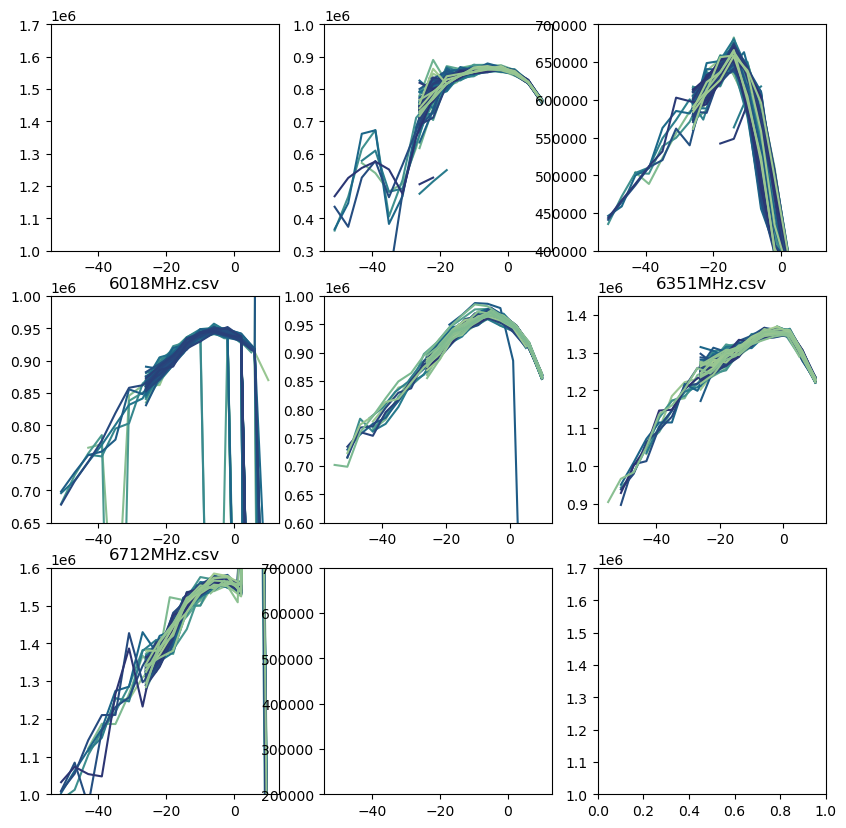

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

ord = [4, 5, 6, 0, 7, 1, 2, 3, 4]
sns.set_palette('crest',100)
fig, ax = plt.subplots(3,3, figsize=(10, 10))
ax = ax.flatten()
for d in directories: 
    csv_files_in_dir = [f for f in os.listdir(os.path.join(folder, d)) if f.endswith('.csv')]
    csv_files_in_dir.sort()
    #print(csv_files_in_dir)
    for i, csv_file in enumerate(csv_files_in_dir):
        file_path = os.path.join(folder, d, csv_file)
        try:
            df = pd.read_csv(file_path)
            #print(f"Processing {csv_file} in {d}")
            # Here you can add any processing you want to do with the DataFrame df
            # For example, you could print the first few rows:
            #print(df.head())
            ax[ord[i]].plot(df['power_dBm'], df['q_internal_alt'])
        except: 
            pass

lims = [[0.65, 1.0], [0.85, 1.45], [1, 1.6], [0.2, 0.7], [1, 1.7], [0.3, 1], [0.4, 0.7], [0.6, 1], [1.2, 1.6]]

for i, a in enumerate(ax): 
    a.set_ylim(lims[ord[i]][0]*1e6, lims[ord[i]][1]*1e6)
    try:
        a.set_title(csv_files_in_dir[ord[i]].split('_')[3])
    except:
        pass

In [ ]:
csv_files = []
for root, dirs, files in os.walk(folder):
    for file in files:
        if file.endswith('.csv'):
            csv_files.append(os.path.join(root, file))

print(f"Found {len(csv_files)} CSV files:")
for csv_file in csv_files:
    print(csv_file)

In [ ]:

# Walk through all subdirectories and files in the folder
for root, dirs, files in os.walk(folder):
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(root, file)
            # Open the CSV file
            df = pd.read_csv(file_path)
            print(f"Opened {file_path}")